This kernel compares the results of 2 models on the 2 datasets.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import roc_curve, roc_auc_score, log_loss

In [2]:
def load_oof_preds(root):
    # Load prediction files from oof prediction
    preds = None
    for i, file in enumerate(os.listdir(root)):
        df = pd.read_csv(root+file)
        if preds is None:
            preds = df
            preds.rename(columns={'is_duplicate':'is_duplicate'+str(i)}, inplace=True)
        else:
            preds['is_duplicate' + str(i)] = df['is_duplicate']
    return preds

### Quora

In [3]:
quora_nn_sols  = load_oof_preds('nn-solution/quora-predictions/')
quora_lgb_sols = load_oof_preds('lgb-solution/quora-predictions/')

gt = pd.read_csv('../quora/train.csv', usecols=['id','is_duplicate'])

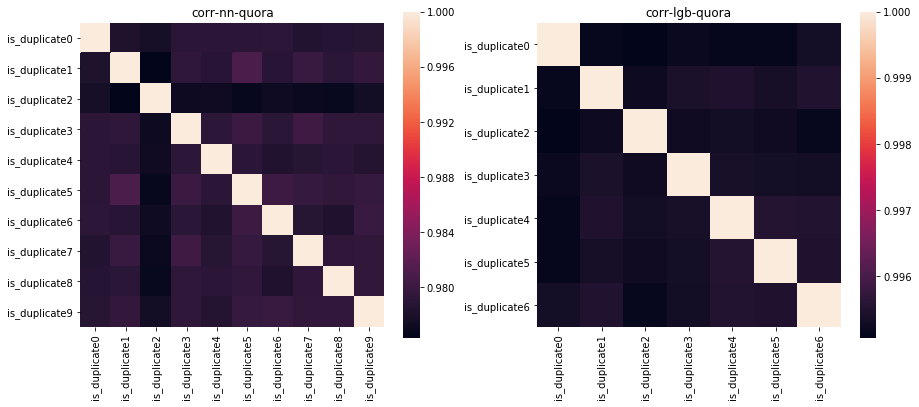

In [4]:
# Correlation map
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

quora_nn_corr = quora_nn_sols.drop('id', axis=1).corr()
sns.heatmap(quora_nn_corr, square=True, ax=ax1)
ax1.set_title('corr-nn-quora')

quora_lgb_corr = quora_lgb_sols.drop('id', axis=1).corr()
sns.heatmap(quora_lgb_corr, square=True, ax=ax2)
ax2.set_title('corr-lgb-quora')
f.savefig('quora-corr-map')

In [5]:
quora_nn_sols  = quora_nn_sols.merge(gt, how='left', on='id')
quora_lgb_sols = quora_lgb_sols.merge(gt, how='left', on='id')

In [6]:
quora_nn_sols['predictions']  = quora_nn_sols[['is_duplicate{}'.format(i) for i in range(10)]].mean(axis=1)
quora_lgb_sols['predictions'] = quora_lgb_sols[['is_duplicate{}'.format(i) for i in range(7)]].mean(axis=1)

In [7]:
print('Loss comparison on quora')
print('log-loss of NN model on quora: {}'.format(log_loss(quora_nn_sols['is_duplicate'], quora_nn_sols['predictions'])))
print('log-loss of lgb model on quora: {}'.format(log_loss(quora_lgb_sols['is_duplicate'], quora_lgb_sols['predictions'])))

Loss comparison on quora
log-loss of NN model on quora: 0.14950567269330925
log-loss of lgb model on quora: 0.2433396604437192


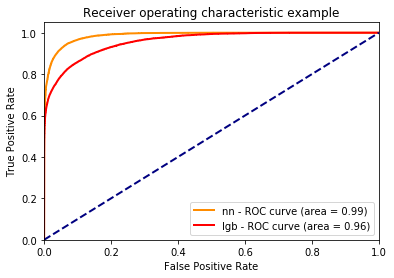

In [9]:
# Compute ROC curve and ROC area for each model
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr['nn-sol'], tpr['nn-sol'], _ = roc_curve(quora_nn_sols['is_duplicate'], quora_nn_sols['predictions'])
roc_auc['nn-sol'] = roc_auc_score(quora_nn_sols['is_duplicate'], quora_nn_sols['predictions'])

fpr['lgb-sol'], tpr['lgb-sol'], _ = roc_curve(quora_lgb_sols['is_duplicate'], quora_lgb_sols['predictions'])
roc_auc['lgb-sol'] = roc_auc_score(quora_lgb_sols['is_duplicate'], quora_lgb_sols['predictions'])

plt.figure()
lw = 2

plt.plot(fpr['nn-sol'], tpr['nn-sol'], color='darkorange',
         lw=lw, label='nn - ROC curve (area = %0.2f)' % roc_auc['nn-sol'])

plt.plot(fpr['lgb-sol'], tpr['lgb-sol'], color='red',
         lw=lw, label='lgb - ROC curve (area = %0.2f)' % roc_auc['lgb-sol'])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Wiki

In [10]:
wiki_nn_sols  = load_oof_preds('nn-solution/wiki-predictions/')
wiki_lgb_sols = load_oof_preds('lgb-solution/wiki-predictions/')

gt = pd.read_csv('../wiki/train.csv', usecols=['id','is_duplicate'])

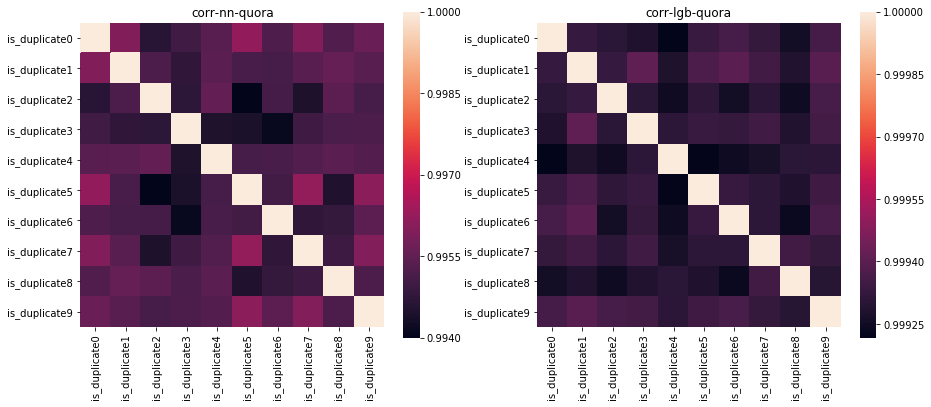

In [11]:
# Correlation map
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

wiki_nn_corr = wiki_nn_sols.drop('id', axis=1).corr()
sns.heatmap(wiki_nn_corr, square=True, ax=ax1)
ax1.set_title('corr-nn-quora')

wiki_lgb_corr = wiki_lgb_sols.drop('id', axis=1).corr()
sns.heatmap(wiki_lgb_corr, square=True, ax=ax2)
ax2.set_title('corr-lgb-quora')
f.savefig('wiki-corr-map')

In [12]:
wiki_nn_sols  = wiki_nn_sols.merge(gt, how='left', on='id')
wiki_lgb_sols = wiki_lgb_sols.merge(gt, how='left', on='id')

In [13]:
wiki_nn_sols['predictions']  = wiki_nn_sols[['is_duplicate{}'.format(i) for i in range(10)]].mean(axis=1)
wiki_lgb_sols['predictions'] = wiki_lgb_sols[['is_duplicate{}'.format(i) for i in range(10)]].mean(axis=1)

In [14]:
print('Loss comparison on wiki')
print('log-loss of NN model on wiki: {}'.format(log_loss(wiki_nn_sols['is_duplicate'], wiki_nn_sols['predictions'])))
print('log-loss of lgb model on quora: {}'.format(log_loss(wiki_lgb_sols['is_duplicate'], wiki_lgb_sols['predictions'])))

Loss comparison on wiki
log-loss of NN model on wiki: 0.014249966942103466
log-loss of lgb model on quora: 0.025796001942078373


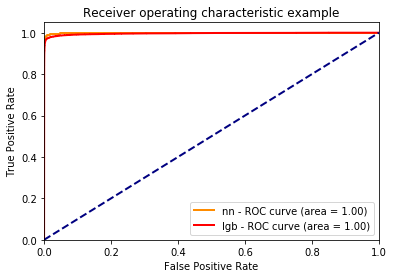

In [16]:
# Compute ROC curve and ROC area for each model
fpr = dict()
tpr = dict()
roc_auc = dict()

fpr['nn-sol'], tpr['nn-sol'], _ = roc_curve(wiki_nn_sols['is_duplicate'], wiki_nn_sols['predictions'])
roc_auc['nn-sol'] = roc_auc_score(wiki_nn_sols['is_duplicate'], wiki_nn_sols['predictions'])

fpr['lgb-sol'], tpr['lgb-sol'], _ = roc_curve(wiki_lgb_sols['is_duplicate'], wiki_lgb_sols['predictions'])
roc_auc['lgb-sol'] = roc_auc_score(wiki_lgb_sols['is_duplicate'], wiki_lgb_sols['predictions'])

plt.figure()
lw = 2

plt.plot(fpr['nn-sol'], tpr['nn-sol'], color='darkorange',
         lw=lw, label='nn - ROC curve (area = %0.2f)' % roc_auc['nn-sol'])

plt.plot(fpr['lgb-sol'], tpr['lgb-sol'], color='red',
         lw=lw, label='lgb - ROC curve (area = %0.2f)' % roc_auc['lgb-sol'])

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()